## Clustering : Customer Segmentation

### Import Library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")
from kmodes.kmodes import KModes  

### Loading Dataset

In [2]:
df = pd.read_csv('training.csv')
df.head()

,id,age,gender,traffic_source,category,retail_price
0,79128,14,M,Search,Accessories,3.0
1,84559,50,M,Search,Accessories,3.0
2,64034,58,F,Organic,Accessories,3.5
3,74318,39,F,Search,Accessories,3.5
4,91110,52,F,Search,Plus,3.5


### Make Column Spend

In [3]:
# Make a copy from dataframe 'df'
dc= df.copy()
# in main dataframe make new column 'spend', where we add all value from column 'retail_price' and group it by 'id'
df['spend'] = dc.groupby('id')['retail_price'].transform('sum')

In [4]:
# and then, drop all duplicate value in column 'id', and we will keep the first data, cause we already group it
df = df.drop_duplicates(subset=['id'],keep='first')

In [5]:
# finally we drop column 'retail_price'
df = df.drop('retail_price', axis=1)
df.head()

,id,age,gender,traffic_source,category,spend
0,79128,14,M,Search,Accessories,19.959999
1,84559,50,M,Search,Accessories,77.500000
2,64034,58,F,Organic,Accessories,102.500000
3,74318,39,F,Search,Accessories,338.400000
4,91110,52,F,Search,Plus,3.500000


### EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36707 entries, 0 to 63024
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              36707 non-null  int64  
 1   age             36707 non-null  int64  
 2   gender          36707 non-null  object 
 3   traffic_source  36707 non-null  object 
 4   category        36707 non-null  object 
 5   spend           36707 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ MB


In [7]:
df.describe()

,id,age,spend
count,36707.000000,36707.000000,36707.000000
mean,50123.757703,40.939112,102.589346
std,28861.074507,16.986800,108.475600
min,1.000000,12.000000,0.020000
25%,25161.500000,26.000000,33.185001
50%,50209.000000,41.000000,66.000000
75%,75146.000000,56.000000,134.949997
max,99997.000000,70.000000,1661.000000


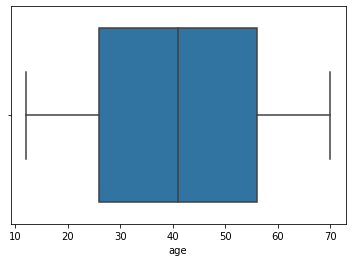

In [8]:
ax = sns.boxplot(x=df["age"])

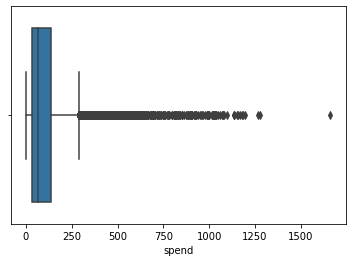

In [9]:
ax = sns.boxplot(x=df["spend"])

[Text(0, 0, '18300'), Text(0, 0, '18407')]

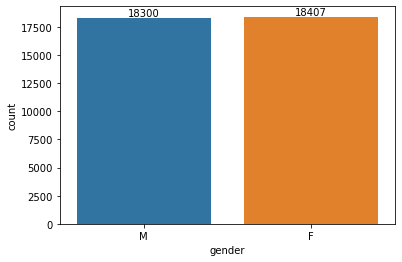

In [10]:
ax = sns.countplot(x='gender', data=df)
ax.bar_label(ax.containers[0])

[Text(0, 0, '25751'),
 Text(0, 0, '5447'),
 Text(0, 0, '1753'),
 Text(0, 0, '1457'),
 Text(0, 0, '2299')]

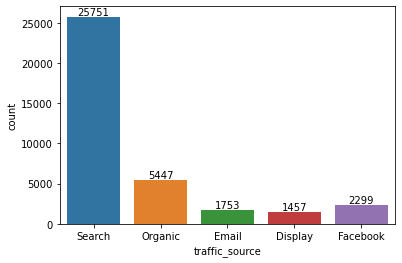

In [11]:
ax = sns.countplot(x='traffic_source', data=df)
ax.bar_label(ax.containers[0])

### Handling Outlier

In [12]:
Q1 = df["spend"].quantile(0.25)
Q3 = df["spend"].quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

more_than     = (df["spend"] > maximum)
lower_than    = (df["spend"] < minimum)
df["spend"] = df["spend"].mask(more_than, maximum) 
df["spend"] = df["spend"].mask(lower_than, minimum)

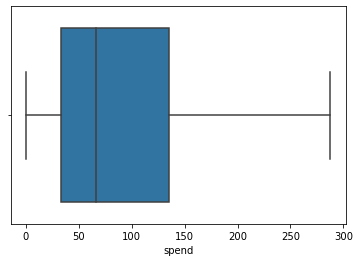

In [13]:
ax = sns.boxplot(x=df["spend"])

In [14]:
df.describe()

,id,age,spend
count,36707.000000,36707.000000,36707.000000
mean,50123.757703,40.939112,94.858028
std,28861.074507,16.986800,79.917093
min,1.000000,12.000000,0.020000
25%,25161.500000,26.000000,33.185001
50%,50209.000000,41.000000,66.000000
75%,75146.000000,56.000000,134.949997
max,99997.000000,70.000000,287.597490


### Label Encoder for Categorical Column

In [15]:
# Make a copy of categorical column from dataset  
df_encode =df[['gender','traffic_source','category']].copy()

In [16]:
# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in df_encode:  
    df_encode[col]= LabelEncoder().fit_transform(df_encode[col])
      
# Menampilkan data  


In [17]:
df_std = df[['age','spend']]

In [18]:
df_model= df_encode.merge(df_std, left_index = True, right_index=True, how= 'left')  
print(df_model.head())

   gender  traffic_source  category  age       spend
0       1               4         0   14   19.959999
1       1               4         0   50   77.500000
2       0               3         0   58  102.500000
3       0               4         0   39  287.597490
4       0               4        14   52    3.500000


<function matplotlib.pyplot.show(close=None, block=None)>

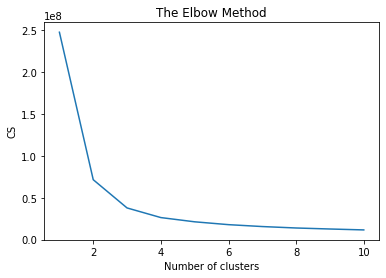

In [19]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_model)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show

In [20]:
kmeans=KMeans(n_clusters=3,random_state=75) 
kmeans.fit(df_model)

KMeans(n_clusters=3, random_state=75)

In [21]:
prediction=kmeans.fit_predict(df_model)
prediction

array([1, 1, 2, ..., 1, 1, 1])

In [22]:
data=df_model.copy()

In [23]:
clustered_data = data.copy()
clustered_data["cluster_index"] = prediction

<AxesSubplot:xlabel='spend', ylabel='age'>

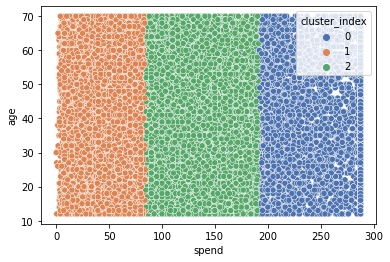

In [24]:
sns.scatterplot(x=clustered_data.spend,
                y=clustered_data.age,
                hue=clustered_data.cluster_index,
                palette="deep")

In [25]:
df['cluster'] = prediction
print(df.head()) 

      id  age gender traffic_source     category       spend  cluster
0  79128   14      M         Search  Accessories   19.959999        1
1  84559   50      M         Search  Accessories   77.500000        1
2  64034   58      F        Organic  Accessories  102.500000        2
3  74318   39      F         Search  Accessories  287.597490        0
4  91110   52      F         Search         Plus    3.500000        1


In [26]:
df_cluster0 = df.loc[df['cluster']== 0]
df_cluster1 = df.loc[df['cluster']== 1]
df_cluster2 = df.loc[df['cluster']== 2]

### Cluster 0

In [27]:
df_cluster0['spend'].min()

191.4499969482422

In [28]:
df_cluster0['spend'].max()

287.59749031066895

In [29]:
df_cluster0['age'].min()

12

In [30]:
df_cluster0['age'].max()

70

In [31]:
df_cluster0['category'].value_counts()

Jeans                            589
Outerwear & Coats                538
Sweaters                         356
Intimates                        340
Suits & Sport Coats              323
Underwear                        310
Swim                             282
Tops & Tees                      270
Sleep & Lounge                   260
Shorts                           246
Active                           226
Fashion Hoodies & Sweatshirts    219
Accessories                      180
Pants                            177
Socks                            166
Dresses                          163
Maternity                        132
Blazers & Jackets                117
Plus                             105
Socks & Hosiery                   79
Pants & Capris                    56
Leggings                          45
Suits                             41
Skirts                            38
Jumpsuits & Rompers               18
Clothing Sets                      5
Name: category, dtype: int64

In [32]:
df_cluster0['gender'].value_counts()

M    2974
F    2307
Name: gender, dtype: int64

In [33]:
df_cluster0['traffic_source'].value_counts()

Search      3767
Organic      742
Facebook     306
Email        253
Display      213
Name: traffic_source, dtype: int64

### Cluster 1

In [34]:
df_cluster1['spend'].min()

0.0199999995529651

In [35]:
df_cluster1['spend'].max()

84.20999908447266

In [36]:
df_cluster1['category'].value_counts()

Intimates                        2110
Tops & Tees                      1661
Shorts                           1477
Fashion Hoodies & Sweatshirts    1473
Sleep & Lounge                   1431
Swim                             1282
Underwear                        1271
Accessories                      1261
Active                           1194
Socks                             998
Sweaters                          988
Jeans                             915
Pants                             750
Maternity                         701
Socks & Hosiery                   701
Plus                              609
Leggings                          467
Dresses                           462
Pants & Capris                    421
Outerwear & Coats                 418
Blazers & Jackets                 258
Skirts                            250
Suits & Sport Coats               236
Jumpsuits & Rompers               130
Suits                              33
Clothing Sets                      19
Name: catego

In [37]:
df_cluster1['gender'].value_counts()

F    11217
M    10299
Name: gender, dtype: int64

In [38]:
df_cluster1['traffic_source'].value_counts()

Search      15060
Organic      3231
Facebook     1340
Email        1025
Display       860
Name: traffic_source, dtype: int64

### Cluster 2

In [39]:
df_cluster2['spend'].min()

84.26000213623048

In [40]:
df_cluster2['spend'].max()

191.2799997329712

In [41]:
df_cluster2['category'].value_counts()

Jeans                            1011
Sweaters                          761
Outerwear & Coats                 745
Intimates                         684
Swim                              647
Sleep & Lounge                    600
Fashion Hoodies & Sweatshirts     550
Shorts                            500
Tops & Tees                       499
Pants                             421
Underwear                         419
Active                            418
Accessories                       416
Dresses                           376
Suits & Sport Coats               302
Socks                             239
Maternity                         231
Plus                              215
Blazers & Jackets                 212
Pants & Capris                    173
Socks & Hosiery                   150
Suits                             113
Skirts                             93
Leggings                           80
Jumpsuits & Rompers                35
Clothing Sets                      20
Name: catego

In [42]:
df_cluster2['gender'].value_counts()

M    5027
F    4883
Name: gender, dtype: int64

In [43]:
df_cluster2['traffic_source'].value_counts()

Search      6924
Organic     1474
Facebook     653
Email        475
Display      384
Name: traffic_source, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36707 entries, 0 to 63024
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              36707 non-null  int64  
 1   age             36707 non-null  int64  
 2   gender          36707 non-null  object 
 3   traffic_source  36707 non-null  object 
 4   category        36707 non-null  object 
 5   spend           36707 non-null  float64
 6   cluster         36707 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 3.1+ MB


### Conclusion

#### Cluster 0

1. Memiliki total belanja antara 191.45 sampai 287.59
2. cluster ini didominasi dengan gender Laki-laki dengan total 56.32% 
3. 71.33% traffic source dari cluster ini adalah Search
4. 5 Kategori teratas dari cluster ini :
        . Jeans
        . Outerwear & Coats 
        . Sweaters
        . Intimates
        . Suits & Sport Coats
        
5. Cluster ini berisi 14.39% dari keseluruhan data


#### Cluster 1

1. Memiliki total belanja antara 0.02 sampai 84.20
2. Cluster ini didominasi perempuan dengan persentase 52.13% 
3. 69.99% traffic source berasal dari search
4. Top 5 kategori :
        . Intimates 
        . Tops & Tees
        . Shorts
        . Fashion Hoodies & Sweatshirts
        . Sleep & Lounge
5. Kebanyakan customer berada pada cluster ini dengan persentase 58.62%

#### Cluster 2

1. Memiliki total belanja antara 84.26 sampai dengan 191.28.
2. Cluster ini didominasi dengan jenis kelamin laki-laki dengan persentase 50.73% | 9910
3. 69.87% traffic source dari cluster ini adalah search
4. 5 kategori teratas dari cluster ini :
        . Jeans
        . Sweaters
        . Outerwear & Coats
        . Intimates
        . Swim 
5. 27% customer berada pada cluster ini.

In [45]:
#df.loc[df['id']== 12287]